In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task2-dataset/input1.png
/kaggle/input/task2-dataset/input2.png


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


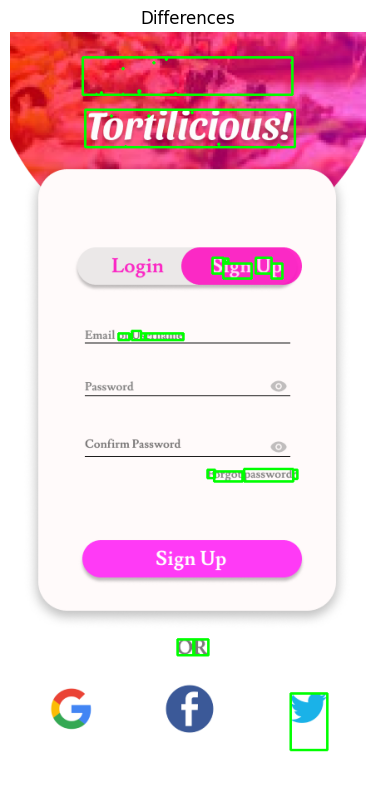

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('/kaggle/input/task2-dataset/input1.png')
image2 = cv2.imread('/kaggle/input/task2-dataset/input2.png')
himg=image1.shape
# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute difference
difference = cv2.absdiff(gray1, gray2)
_, thresh = cv2.threshold(difference, 0.0001,100,cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding box
for contour in contours:
    x,y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)
# Convert BGR to RGB for matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image1_rgb)
plt.title('Differences')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
output_path_grouped_words = '/kaggle/working/image1_rgb.png'

In [4]:
# # Function to group contours based on horizontal proximity
# def group_contours(contours, threshold_x=50):
#     """
#     Groups contours that are close to each other based on a horizontal distance threshold.
#     Returns a list of grouped contour coordinates (x, y, w, h).
#     """
#     # Sort contours from left to right
#     bounding_boxes = [cv2.boundingRect(c) for c in contours]
#     bounding_boxes.sort(key=lambda x: x[0])

#     # Group contours
#     grouped_boxes = []
#     group = [bounding_boxes[0]]
#     for current_box in bounding_boxes[1:]:
#         previous_box = group[-1]
#         # If the current box is close to the previous box, group them together
#         if current_box[0] <= previous_box[0] + previous_box[2] + threshold_x:
#             group.append(current_box)
#         else:
#             # Group is finished, append it to the list
#             grouped_boxes.append(group)
#             group = [current_box]
#     # Append the last group
#     grouped_boxes.append(group)
    
#     # Merge the groups into bounding boxes
#     merged_boxes = []
#     for group in grouped_boxes:
#         # Calculate the min and max x and y coordinates for the group
#         x_min = min([box[0] for box in group])
#         y_min = min([box[1] for box in group])
#         x_max = max([box[0] + box[2] for box in group])
#         y_max = max([box[1] + box[3] for box in group])
#         merged_boxes.append([x_min, y_min, x_max - x_min, y_max - y_min])
    
#     return merged_boxes

# # Load the images again
# image1 = cv2.imread('/kaggle/input/task2-dataset/input1.png')
# image2 = cv2.imread('/kaggle/input/task2-dataset/input2.png')

# # Convert to grayscale
# gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# # Compute the absolute difference between the images
# difference = cv2.absdiff(gray1, gray2)

# # Threshold the difference
# _, thresholded = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)

# # Find contours from the thresholded image
# contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Draw bounding box for grouped words based on contours on the original image
# merged_boxes = group_contours(contours, threshold_x=50)
# for box in merged_boxes:
#     x, y, w, h = box
#     cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # Save the output image
# output_path_grouped_words = '/kaggle/working/detection_output_grouped_words.png'
# cv2.imwrite(output_path_grouped_words, image1)

# output_path_grouped_words


In [5]:
# # Find contours
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Function to check if contours are close enough to be considered one word
# def are_contours_close(cnt1, cnt2, distance_threshold=50):
#     x1, y1, w1, h1 = cv2.boundingRect(cnt1)
#     x2, y2, w2, h2 = cv2.boundingRect(cnt2)
#     if (abs(x1 - x2) < distance_threshold or abs((x1 + w1) - (x2 + w2)) < distance_threshold) and \
#        (abs(y1 - y2) < distance_threshold or abs((y1 + h1) - (y2 + h2)) < distance_threshold):
#         return True
#     return False

# # Merge contours that are close to each other
# def merge_close_contours(contours, distance_threshold=50):
#     merged_contours = []
#     for contour in contours:
#         # Assume contour is not merged and should be added as new
#         merged = False
#         for merged_contour in merged_contours:
#             if are_contours_close(contour, merged_contour, distance_threshold):
#                 # Merge current contour with the existing merged contour
#                 merged_contour.extend(contour)
#                 merged = True
#                 break
#         if not merged:
#             # Add as a new merged contour
#             merged_contours.append(contour)
#     # Get bounding boxes from merged contours
#     bounding_boxes = [cv2.boundingRect(np.vstack(mc)) for mc in merged_contours]
#     return bounding_boxes

# # Apply merging function to contours
# bounding_boxes = merge_close_contours(contours)


In [6]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load images
# image1 = cv2.imread('/kaggle/input/task2-dataset/input1.png')
# image2 = cv2.imread('/kaggle/input/task2-dataset/input2.png')

# # Convert to grayscale
# gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# # Compute difference
# difference = cv2.absdiff(gray1, gray2)
# _, thresh = cv2.threshold(difference, 25, 255, cv2.THRESH_BINARY)

# # Find contours
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Function to determine if two bounding boxes are close enough to be considered as one word
# def boxes_close(b1, b2, distance_threshold):
#     x1, y1, w1, h1 = b1
#     x2, y2, w2, h2 = b2
    
#     # Calculate the right edge of the bounding boxes
#     right_edge1 = x1 + w1
#     right_edge2 = x2 + w2
    
#     # Check if the boxes are close on the x-axis
#     close_on_x = min(right_edge1, right_edge2) - max(x1, x2) > -distance_threshold
    
#     # Check if the boxes are approximately on the same level on the y-axis
#     close_on_y = abs((y1 + h1 / 2) - (y2 + h2 / 2)) < h1
    
#     return close_on_x and close_on_y

# # Create a list of bounding boxes from contours
# bounding_boxes = [cv2.boundingRect(c) for c in contours]

# # Sort the bounding boxes by x coordinate
# sorted_boxes = sorted(bounding_boxes, key=lambda b: b[0])

# # Merge close bounding boxes
# merged_boxes = []
# for box in sorted_boxes:
#     if not merged_boxes:
#         merged_boxes.append(box)
#         continue
#     if boxes_close(merged_boxes[-1], box, 10):
#         # Merge boxes
#         x1, y1, w1, h1 = merged_boxes[-1]
#         x2, y2, w2, h2 = box
#         merged_box = (min(x1, x2), min(y1, y2), max(x1 + w1, x2 + w2) - min(x1, x2), max(y1 + h1, y2 + h2) - min(y1, y2))
#         merged_boxes[-1] = merged_box
#     else:
#         merged_boxes.append(box)

# # Draw the merged bounding boxes on the original image
# for (x, y, w, h) in merged_boxes:
#     cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 0, 0), 2)

# # Convert BGR to RGB for matplotlib
# image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# # Display image using matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(image1_rgb)
# plt.title('Differences')
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()


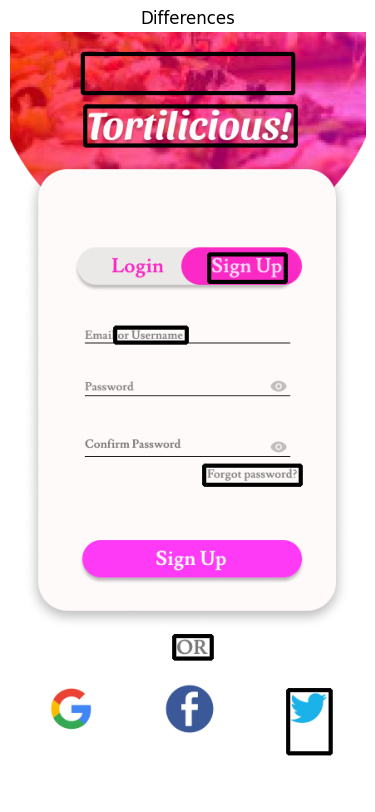

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('/kaggle/input/task2-dataset/input1.png')
image2 = cv2.imread('/kaggle/input/task2-dataset/input2.png')

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute difference
difference = cv2.absdiff(gray1, gray2)
_, thresh = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)  # Increased threshold

# Apply morphological dilation
kernel = np.ones((5,5), np.uint8)  # Adjust kernel size as needed
thresh = cv2.dilate(thresh, kernel, iterations = 2)  # Adjust iterations based on desired dilation

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding box for each contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 0, 0), 3)  # Increased box
image2_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image2_rgb)
plt.title('Differences')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
output_path_grouped_words = '/kaggle/working/image2_rgb.png'
